In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [14]:
device = torch.device('cuda:0')

In [15]:
from utils.test_utils import obtain_AL_ckpts, split_AL_loaders
from utils.test_utils import load_AL_config, load_AL_dataloader, load_test_model

In [16]:
save_dir = '../results/simulation/220226_0425'
config_file, state_list, data_files = obtain_AL_ckpts(save_dir)

unknown file:  train_AL.txt


In [17]:
print(state_list, data_files)

['binaryNN_0.pt', 'binaryNN_1.pt', 'binaryNN_2.pt', 'binaryNN_3.pt', 'binaryNN_4.pt', 'binaryNN_5.pt', 'binaryNN_6.pt', 'binaryNN_7.pt', 'binaryNN_8.pt', 'binaryNN_9.pt'] ['test_loader.pkl', 'final_dataloader.pkl']


### load models and train data loaders

In [18]:
args = load_AL_config(save_dir, config_file)
dl_loader = load_AL_dataloader(args.save_dir,data_files[0])
test_loader = load_AL_dataloader(args.save_dir,data_files[1])

In [19]:
dl_loaders,dl_cum_loaders = split_AL_loaders(dl_loader, args)

/home/saerom/fairness/fairness_AL/codes/utils/data_utils.py:141: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensors = (torch.tensor(da).clone().detach().float() for da in dataarrays)


In [20]:
from utils.test_utils import test_groupwise, test_model

In [21]:
for it,st in enumerate(state_list):
    print("="*50)
    clf,clf_criterion = load_test_model(save_dir, st, args)
    _, acc = test_model(clf, dl_cum_loaders[it],clf_criterion, device, args.problem_type)
    _, acc2 = test_model(clf, test_loader,clf_criterion, device, args.problem_type)
    print("cumulated total training/test acc:", acc,"/",acc2)
    test_groupwise(clf, dl_cum_loaders[it],clf_criterion, device, 
               AL_select = args.AL_select, problem_type = args.problem_type, return_loader=False)
    print("test set performance")
    test_groupwise(clf, test_loader,clf_criterion, device, 
               AL_select = args.AL_select, problem_type = args.problem_type, return_loader=False)
    print('-'*50)
    for i in range(it+1):
        _, acc = test_model(clf, dl_loaders[i],clf_criterion, device, args.problem_type)
        print("data loader",i, "acc:",acc)
        test_groupwise(clf, dl_loaders[i],clf_criterion, device, 
               AL_select = args.AL_select, problem_type = args.problem_type, return_loader=False)
        print("")

loaded model is binaryNN_0.pt
cumulated total training/test acc: tensor(61.) / tensor(72.8571)
0.0 : loss 0.8823310732841492 / acc 61.33333206176758
1.0 : loss 0.7455955147743225 / acc 60.0
test set performance
0.0 : loss 0.7534351348876953 / acc 70.48611450195312
1.0 : loss 0.5901824831962585 / acc 78.03030395507812
--------------------------------------------------
data loader 0 acc: tensor(61.)
0.0 : loss 0.8823310732841492 / acc 61.33333206176758
1.0 : loss 0.7455955147743225 / acc 60.0

loaded model is binaryNN_1.pt
cumulated total training/test acc: tensor(53.0303) / tensor(68.0952)
0.0 : loss 0.7066555619239807 / acc 45.0
1.0 : loss 0.6198605298995972 / acc 78.125
test set performance
0.0 : loss 0.6387528777122498 / acc 63.54166793823242
1.0 : loss 0.5922176241874695 / acc 78.03030395507812
--------------------------------------------------
data loader 0 acc: tensor(53.)
0.0 : loss 0.7048124074935913 / acc 45.33333206176758
1.0 : loss 0.6294082999229431 / acc 76.0

data loader 1

/home/saerom/fairness/fairness_AL/codes/utils/eval_utils.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred = torch.tensor(output>thr,dtype = torch.float32)


tensor(61.2245) / tensor(73.3333)
0.0 : loss 0.6605207324028015 / acc 61.643836975097656
1.0 : loss 0.6565737128257751 / acc 60.0
test set performance
0.0 : loss 0.5678292512893677 / acc 72.56944274902344
1.0 : loss 0.5356617569923401 / acc 75.0
--------------------------------------------------
data loader 0 acc: tensor(62.)
0.0 : loss 0.6583942174911499 / acc 61.33333206176758
1.0 : loss 0.6284701824188232 / acc 64.0

data loader 1 acc: tensor(53.1250)
0.0 : loss 0.6570213437080383 / acc 52.0
1.0 : loss 0.6450551748275757 / acc 57.14285659790039

data loader 2 acc: tensor(75.)
0.0 : loss 0.6135209202766418 / acc 73.91304016113281
1.0 : loss 0.5624483227729797 / acc 77.77777099609375

data loader 3 acc: tensor(53.1250)
0.0 : loss 0.7182220816612244 / acc 60.869564056396484
1.0 : loss 0.8377202749252319 / acc 33.33333206176758

loaded model is binaryNN_4.pt
cumulated total training/test acc: tensor(60.5263) / tensor(77.6190)
0.0 : loss 0.7530023455619812 / acc 65.8536605834961
1.0 : lo

In [22]:
from utils.data_utils import dataset_description, dl2nparray

data loader 0


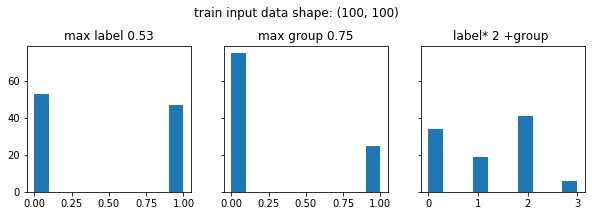

data loader 1


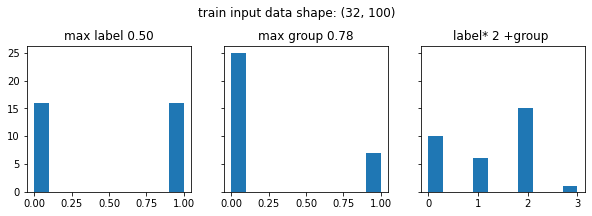

data loader 2


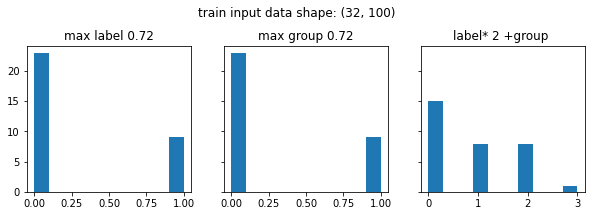

data loader 3


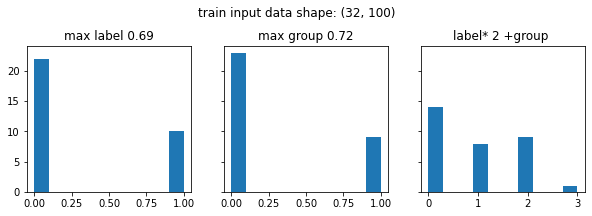

data loader 4


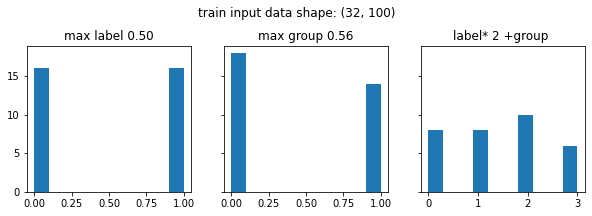

data loader 5


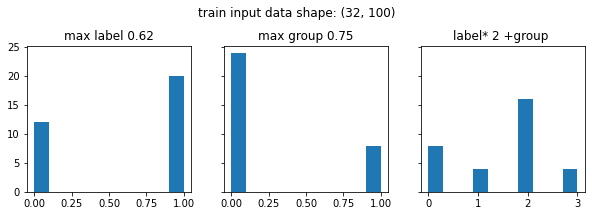

data loader 6


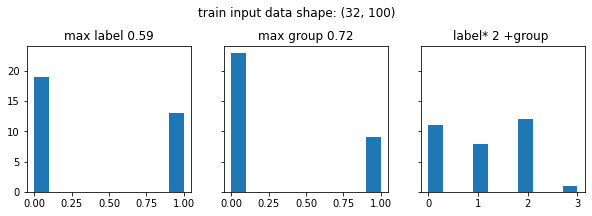

data loader 7


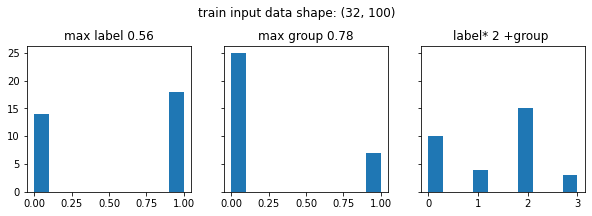

data loader 8


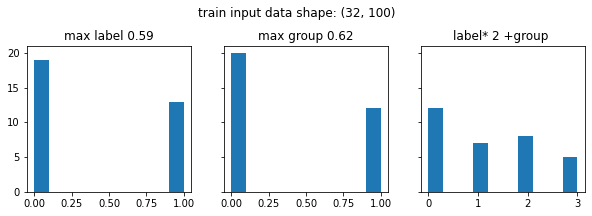

data loader 9


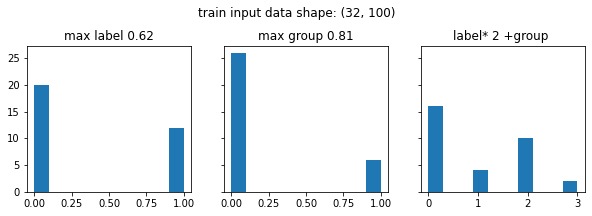

data loader 10


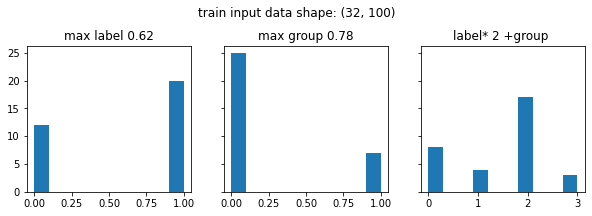

In [23]:
for i in range(len(dl_loaders)):
    print("data loader",i)
    x,y,z = dl2nparray(dl_loaders[i])
    dataset_description(x,y,z)

data cumulative loader 0


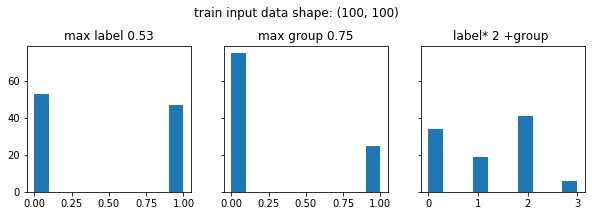

data cumulative loader 1


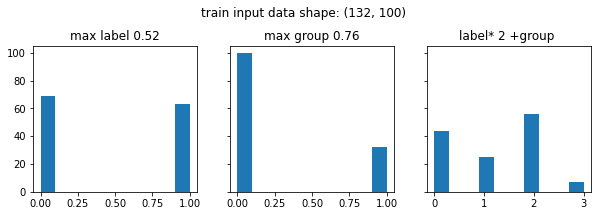

data cumulative loader 2


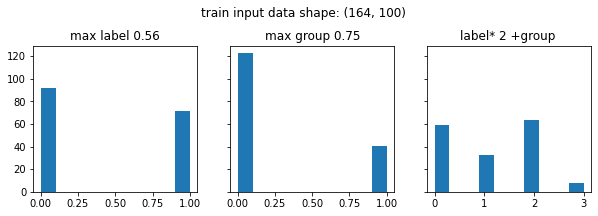

data cumulative loader 3


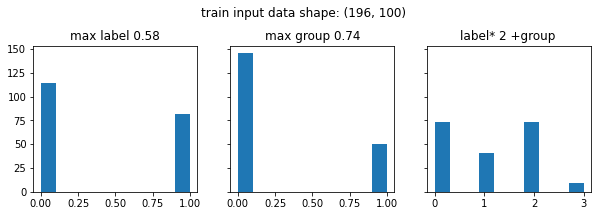

data cumulative loader 4


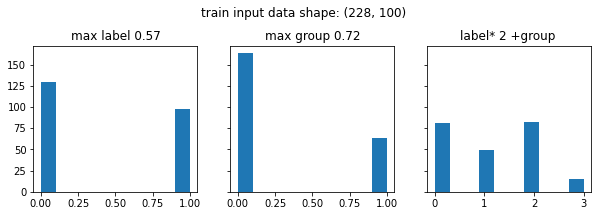

data cumulative loader 5


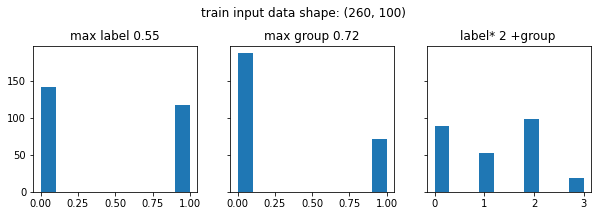

data cumulative loader 6


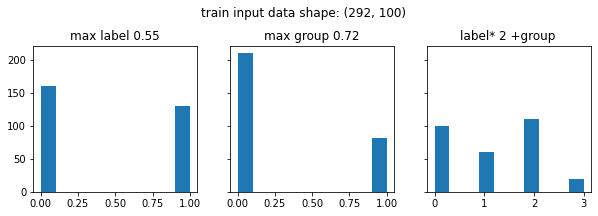

data cumulative loader 7


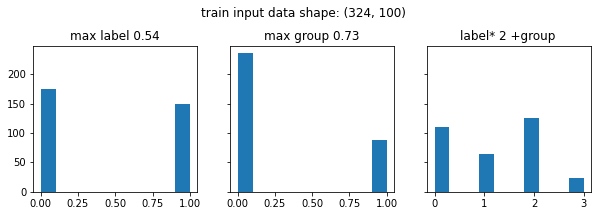

data cumulative loader 8


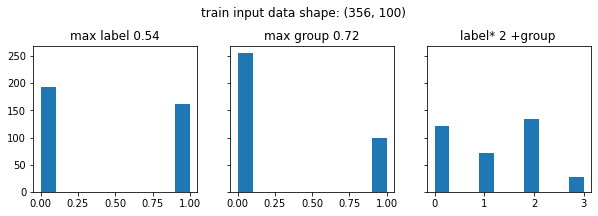

data cumulative loader 9


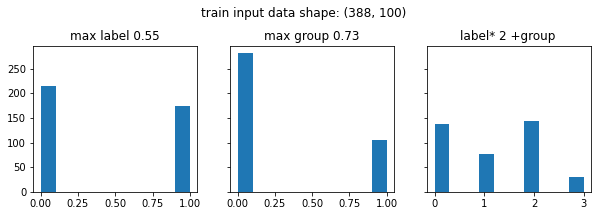

data cumulative loader 10


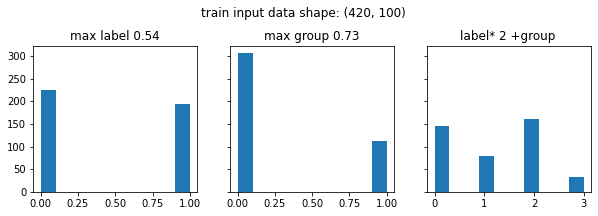

In [24]:
for i in range(len(dl_loaders)):
    print("data cumulative loader",i)
    x,y,z = dl2nparray(dl_cum_loaders[i])
    dataset_description(x,y,z)